# Bank Customer Churn Analysis

## Business Understanding

Stakeholder: Bank Owners and Managers that want to better understand if there is an identifiable pattern that we can find that will help to predict whether or not a customer will leave the bank.

## Data Understanding

The data used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn).

The dataset contains 18 columns housing 10,000 unique bank customer records. Generally speaking, the columns in this dataset contain various demographic measures, like age and country where the customer is living, along with recorded metrics that the bank is tracking like the Balance in each customer's account and how long the customer has held an account at the bank. A detailed description of each column was provided by the auther of the dataset, and I have copied it below:

#### Column Descriptions - from Kaggle:
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

## Data Preparation

### Import necessary libraries + tools:

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix 
from sklearn.metrics import plot_roc_curve, accuracy_score, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_csv('data/Customer-Churn-Records.csv')

### EDA

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.dtypes.value_counts()

int64      12
object      4
float64     2
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### EDA Inital Results:
- The data does not have any null values to address.
- There are unneccessary columns that will need to be dropped:
    - RowNumber: This appears to be a duplicate index.
    - CustomerId: We are not analyzing specifc customer records, therefore we would not need to keep any information identifying individuals
    - Surname: similar information to the CustomerId column, we do not need individuals' information for this analysis.
- Certain 'object' type columns containing categorical variables need to be dealt with before being added to a model.
    - Geography: Spain, France, Germany
    - Gender: Male, Female
    - Card Type: DIAMOND, GOLD, SILVER, PLATINUM
- There are numeric columns that contain values that appear to be binary or their values may be ordinal.
    - Binary columns: 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain' 
    - Ordinal column: 'Satisfaction Score'
        - Will need to treat this column more like a categorical variable than a numeric feature.


#### Dropping Columns (reasoning desc. above):

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df.shape

(10000, 15)

#### Feature/Column Further Exploration:

##### Categorical Columns:

In [9]:
df['Geography'].value_counts()
# Will need to be processed - can be made into a binary variable columns via OneHotEncoder
# France appears to have the greatest number of Customers represented, at almost double both of the other countries

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()
# Will need to be processed - can be made into a binary variable column via OneHotEncoder

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df['Card Type'].value_counts()
# Will need pre-processing, could OneHotEncode out this column
## Appears that each of the card types has around 1/4 of all of the records (~2500 each)

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

##### Ordinal Column:

In [12]:
df['Satisfaction Score'].value_counts()
# The values in this column appear to be ordinal, with a 5 as the highest satisfaction rating, 1 as the lowest
# Each of the 5 satisfaction ratings appears to have recieved virtually the same number of scores, with the exception of 1 (which is still very close)

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

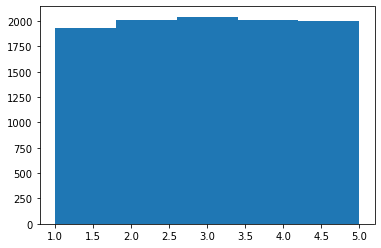

In [13]:
plt.hist(df['Satisfaction Score'], bins=5);

##### Binary Categorical Columns
- No additional preprocessing needed in order to include model with these variables:

In [14]:
df['Exited'].value_counts() # Likely going to be the target. 1 appears to represent if a customer left (churned)
## Appears to be slighly imbalanced, but not terribly so. Roughly 80/20 stay/leave

0    7962
1    2038
Name: Exited, dtype: int64

In [15]:
df['HasCrCard'].value_counts()
# Binary values - will not need to preprocess this any further. 1 represents a customer with a CC.

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
df['IsActiveMember'].value_counts()
# Binary values - no preprocessing needed. 1 rep's a subjective figure that a customer 'IS active'?
## Not sure what defines active vs inactive, and there doesn't appear to be add'l details provided.

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df['Complain'].value_counts()
# Binary, It appears that most (80%) of custmers have not filed complaints - this may be a key value...

0    7956
1    2044
Name: Complain, dtype: int64

##### Numeric Columns:

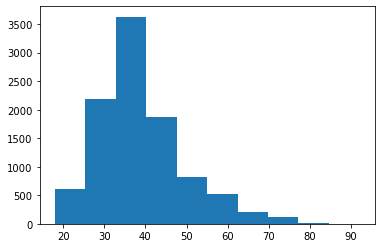

In [18]:
plt.hist(df['Age']);

In [19]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

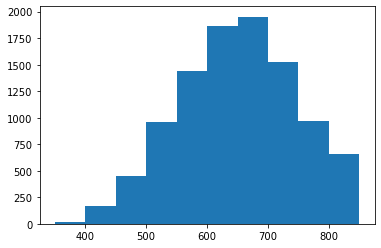

In [20]:
plt.hist(df['CreditScore']);

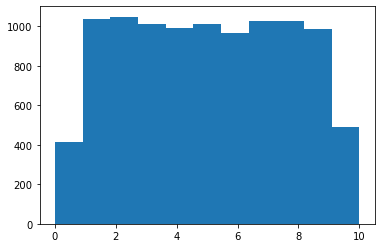

In [21]:
plt.hist(df['Tenure'], bins=11);
# With the Tenure values from 1-9 being virtually equal, this is likely NOT a good feature to measure churn.

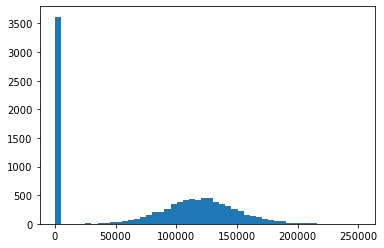

In [22]:
plt.hist(df['Balance'], bins=50);
# A LOT of zeros, this feature may skew our data??

In [23]:
df['NumOfProducts'].value_counts()
# May need to split this value into 4 separate columns! (OneHotEncode?)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

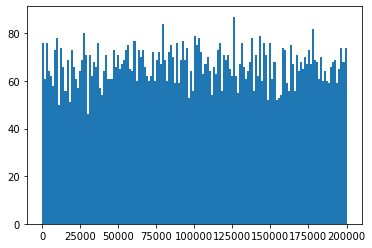

In [24]:
plt.hist(df['EstimatedSalary'], bins=150);
# It appears that this column's values are widely distributed and there is variety of salaries represented (somewhat evenly)

In [25]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

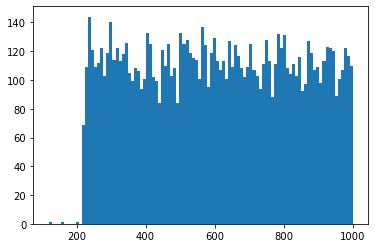

In [26]:
plt.hist(df['Point Earned'], bins=100);

## Modeling

#### Target Identified:
- A 0 represents a customer that DID NOT leave the bank.
    - It appears that about 80% of customers have remained at the bank.
- A 1 represents a customer that DID leave the bank AKA a customer that churned.
    - It appears that about 20% of customers have left the bank.

In [27]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

#### Exploring the Relationships between the target and other features:
- It appears that the 'Complain' column, which denotes whether or not a customer has filed a complaint (1 meaning Yes, a complaint was filed), almost perfectly correlates with the target. This is a KEY feature for this reason, and including this feature or not will likely have a major impact on how the models will learn to predict churn.

In [28]:
df_corrs = df.corr()['Exited'].map(abs).sort_values(ascending=False)
df_corrs

Exited                1.000000
Complain              0.995693
Age                   0.285296
IsActiveMember        0.156356
Balance               0.118577
NumOfProducts         0.047611
CreditScore           0.026771
Tenure                0.013656
EstimatedSalary       0.012490
HasCrCard             0.006976
Satisfaction Score    0.005849
Point Earned          0.004628
Name: Exited, dtype: float64

#### Splitting Categorical and Numeric Data
- Numeric data is readily able to be used in a model, whereas categorical data will require preporcessing. For the first model iterations, I will only use numeric data to get a baseline model.

In [29]:
categorical = df[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']]

In [30]:
numeric = df.drop(['Geography', 'Gender', 'Satisfaction Score', 'Card Type'], axis=1)

In [31]:
numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,425


### First Model (Dummy) - Numeric Data ONLY

In [82]:
X = numeric.drop('Exited', axis=1)
y = numeric['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

AttributeError: 'list' object has no attribute 'drop'

In [83]:
y_train.value_counts(normalize=True)

0    0.7976
1    0.2024
Name: Exited, dtype: float64

In [84]:
y_test.value_counts(normalize=True)

0    0.792
1    0.208
Name: Exited, dtype: float64

In [85]:
y.value_counts(normalize=True)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [86]:
model_1 = DummyClassifier(strategy='most_frequent')

In [87]:
model_1.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [88]:
model_1.predict(X_train) # should be ALL zeros

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
model_1.score(X_train, y_train) 

0.7976

>This dummy model is able to predict that a customer IS NOT churning (0) at ~80% accuracy, which is similar, almost equal to the value we found running a value_counts on the 'Exited' column alone.

In [90]:
cross_val_score(model_1, X_train, y_train, cv=5).mean()

0.7976000000000001

As expected, the cross validated score for this dummy model is ~80%

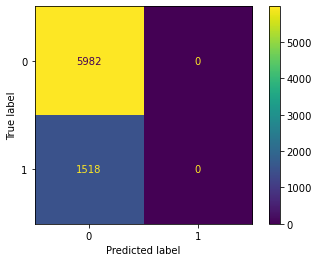

In [91]:
plot_confusion_matrix(model_1, X_train, y_train);

We can see that the model accurately predicted 5982 customers as staying (0), while also incorrectly predicting that
the other 1518 customers would stay, when they actually churned. 

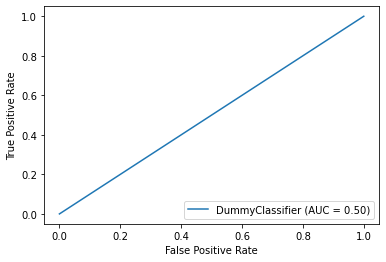

In [92]:
plot_roc_curve(model_1, X_train, y_train);

Becasue the model is predicting ONLY the most frequent (0) values, the area under the curve is .5, the lowest it can 
be. 

### Second Model(s) w/ Numeric Variables ONLY (Logistic Regression)

### Without dropping 'Complain':

In [93]:
df_num = df[numeric]
X_num = df_num.drop(['Exited'], axis=1)
y_num = df_num['Exited']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, random_state=1)

In [94]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_num)
X_test_sc = scaler.transform(X_test_num)

In [95]:
model_2 = LogisticRegression()

In [96]:
model_2.fit(X_train_sc, y_train_num)

LogisticRegression()

In [97]:
model_2.score(X_train_sc, y_train_num)

0.9988

In [98]:
model_2.predict_proba(X_train_sc)[:-300]

array([[9.98710632e-01, 1.28936758e-03],
       [9.99774679e-01, 2.25320734e-04],
       [9.99495735e-01, 5.04265205e-04],
       ...,
       [9.99886850e-01, 1.13149788e-04],
       [9.99485858e-01, 5.14142262e-04],
       [9.99515709e-01, 4.84291003e-04]])

In [107]:
confusion_matrix(y_train_num, model_2.predict(X_train_sc))

array([[5975,    7],
       [   2, 1516]])

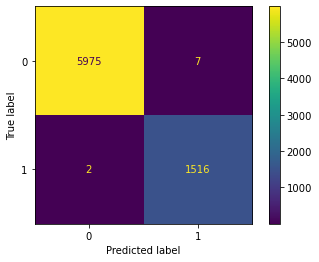

In [109]:
plot_confusion_matrix(model_2, X_train_sc, y_train_num);

In [100]:
cross_val_score(model_2, X_train_sc, y_train_num, cv=5).mean()

0.9987999999999999

In [101]:
accuracy_score(y_train_num, model_2.predict(X_train_sc))

0.9988

In [102]:
recall_score(y_train_num, model_2.predict(X_train_sc))

0.9986824769433466

In [103]:
precision_score(y_train_num, model_2.predict(X_train_sc))

0.9954038082731451

In [104]:
f1_score(y_train_num, model_2.predict(X_train_sc))

0.9970404472213088

In [105]:
print('[Model 1 Test Data]')
print(f'Test Accuracy:{accuracy_score(y_test_num, logreg.predict(X_test_sc))}')
print(f'Test Recall:{recall_score(y_test_num, logreg.predict(X_test_sc))}')
print(f'Test Precision:{precision_score(y_test_num, logreg.predict(X_test_sc))}')
print(f'Test f1:{f1_score(y_test_num, logreg.predict(X_test_sc))}')

[Model 1 Test Data]
Test Accuracy:0.998
Test Recall:0.9961538461538462
Test Precision:0.9942418426103646
Test f1:0.9951969260326609


### NEED a DETAILED explanation as to WHY we will continue the analysis WITHOUT the 'Complain' feature.
### Recommendation 1:
- When including the 'Complain' column data, we are able to almost perfectly predict whether or not a customer will churn.
- Essentially, if a customer complains, then they are VERY likely to leave the bank and should have their complaint addressed appropriately OR they will leave.

### Dropping 'Complain'

In [57]:
X_num2 = df_num.drop(['Exited', 'Complain'], axis=1)
y_num2 = df_num['Exited']
X_train_num2, X_test_num2, y_train_num2, y_test_num2 = train_test_split(X_num2, y_num2, random_state=1)

In [58]:
scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_train_num2)
X_test_sc2 = scaler.transform(X_test_num2)

In [59]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_sc2, y_train_num2)

LogisticRegression()

In [60]:
logreg2.score(X_train_sc2, y_train_num2)

0.806

In [61]:
logreg2.score(X_test_sc2, y_test_num2)

0.8068

In [62]:
confusion_matrix(y_train_num2, logreg2.predict(X_train_sc2))

array([[5826,  156],
       [1299,  219]])

In [63]:
cross_val_score(logreg2, X_train_sc2, y_train_num2, cv=5, scoring='recall').mean()

0.14755080771235018

In [64]:
print('[Model 2 Test Data]')
print(f'Test Accuracy:{accuracy_score(y_test_num2, logreg2.predict(X_test_sc2))}')
print(f'Test Recall:{recall_score(y_test_num2, logreg2.predict(X_test_sc2))}')
print(f'Test Precision:{precision_score(y_test_num2, logreg2.predict(X_test_sc2))}')
print(f'Test f1:{f1_score(y_test_num2, logreg2.predict(X_test_sc2))}')

[Model 2 Test Data]
Test Accuracy:0.8068
Test Recall:0.17115384615384616
Test Precision:0.6312056737588653
Test f1:0.2692889561270802


### Dealing with Categorical and Numeric Variables separately - NO 'Complain' column

In [65]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel

In [66]:
# ohe = OneHotEncoder(drop="first", sparse_output=False)

In [67]:
#ohe.fit(df_cat)

In [68]:
#ohe.transform(df_cat)

In [69]:
cat = df[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']].copy()
cat = pd.get_dummies(cat, columns=['Geography', 'Gender', 'Satisfaction Score', 'Card Type'], drop_first=True, dtype=int)
cat

,Geography_Germany,Geography_Spain,Gender_Male,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,1,0,0,0,1,0,1,0
9997,0,0,0,0,1,0,0,0,0,1
9998,1,0,1,1,0,0,0,1,0,0


In [70]:
num_cat = pd.concat([X_num2, cat], axis=1)
num_cat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,464,0,0,0,1,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,456,0,1,0,0,1,0,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,377,0,0,0,0,1,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,350,0,0,0,0,0,0,1,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,425,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,300,0,0,1,0,0,0,0,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,771,0,0,1,0,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,564,0,0,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,339,1,0,1,1,0,0,0,1,0,0


In [71]:
X_num_cat = num_cat
y = df['Exited']

In [72]:
df_num = df[numeric]
X_num = df_num.drop(['Exited'], axis=1)
X_cat = df_cat
y_num = df_num['Exited']


NameError: name 'df_cat' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Beginnging to tackle categoricals
ohe = OneHotEncoder(drop='first')
cats = ohe.fit_transform(X_train[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']])

# Getting a DF
cats_df = pd.DataFrame(cats.todense(), columns=ohe.get_feature_names(),
                         index=X_train.index)

cats_df

In [ ]:
#Scaling the numerics again:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Point Earned']
X_train_num2 = X_train[numeric]
X_test_num2 = X_test[numeric]
X_train_num_sc = scaler.fit_transform(X_train_num2)
X_test_num_sc = scaler.transform(X_test_num2)

In [ ]:
nums_df = pd.DataFrame(X_train_num_sc, columns=numeric,
                         index=X_train.index)


In [ ]:
X_train_sc_df = pd.concat([nums_df[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Point Earned']], cats_df], axis=1)
X_train_sc_df.head()

In [ ]:
model3 = LogisticRegression()

In [ ]:
cross_val_score(model3, X_train_sc_df, y_train, scoring='recall').mean()

In [ ]:
model3.fit(X_train_sc_df, y_train)

In [ ]:
recall_score(y_train, model3.predict(X_train_sc_df))

In [ ]:
model4 = LogisticRegression(penalty='none')

In [ ]:
model4.fit(X_train_sc_df, y_train)

In [ ]:
recall_score(y_train, model4.predict(X_train_sc_df))

In [ ]:
cross_val_score(model4, X_train_sc_df, y_train, scoring='recall').mean()

In [ ]:
model5 = LogisticRegression(C=10000)

In [ ]:
model5.fit(X_train_sc_df, y_train)

In [ ]:
recall_score(y_train, model5.predict(X_train_sc_df))

In [ ]:
model6 = LogisticRegression(class_weight='balanced', penalty='none')
model6.fit(X_train_sc_df, y_train)

In [ ]:
cross_val_score(model6, X_train_sc_df, y_train, scoring='recall').mean()

In [ ]:
recall_score(y_train, model6.predict(X_train_sc_df))

In [ ]:
# match with features/column names
list(zip(X_train_sc_df.columns, list(model6.coef_[0])))

In [ ]:
# What we'll feed into our model

X_train_df = pd.concat([X_train[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']], dummies_df], axis=1)
X_train_df.head()

In [ ]:
# Note the same transformation (not FIT) to match structure
test_dummies = ohe.transform(X_test[['Geography', 'Gender', 'Satisfaction Score', 'Card Type']])
test_df = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names(),
                       index=X_test.index)
X_test_df = pd.concat([X_test[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']], test_df], axis=1)

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_df, y_train)

In [ ]:
lr.score(X_train_df, y_train)

## Evaluation